### 差分隐私变体

我们通过图像直观感受一下上述结论。我们把问询”向量化”，看看隐私消耗量会发生什么变化。我们将多个问询合并为一个问询，此问询返回包含多个回复的向量。因为回复值是一个向量，我们可以使用一次向量值拉普拉斯机制，从而避免使用组合定理。接下来，我们分别为串行组合性和”向量”形式画出k次问询所需的噪声量。在串行组合性中，每个问询的敏感度是1，因此每个问询的噪声尺度为$\frac{1}{\epsilon_i}$。如果我们想让总隐私消耗量等于$\epsilon$，则$\epsilon_i$的求和结果应等于$\epsilon$，因此$\epsilon_i = \frac{\epsilon}{k}$。这意味着每个问询需要尺度为$\frac{k}{\epsilon}$的拉普拉斯噪声。”向量化”形式只包含一次问询，但此问询的$L1$敏感度为$\sum_{i=1}^k 1 = k$。因此，向量化形式的噪声尺度同样为$\frac{k}{\epsilon}$.

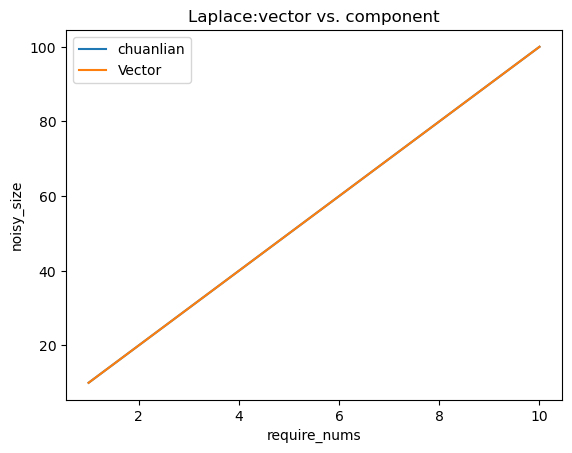

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ks = np.linspace(1, 10, 20)
epsilon = .1

# 每个问询的L1敏感度：1
# 每个问询的噪声尺度：1/ε
# 问询次数：k
noises_seq = [k*(1/epsilon) for k in ks]
plt.plot(ks, noises_seq, label='chuanlian')

# 问询次数：1
# 每个问询的L1敏感度：k
# 每个问询的噪声尺度：k/ε
noises_l1 = [1*(k/epsilon) for k in ks]
plt.plot(ks, noises_l1, label='Vector')
plt.title('Laplace:vector vs. component')
plt.xlabel('require_nums')
plt.ylabel('noisy_size')
plt.legend();

两条线完全重合。这意味着我们无论执行多少次问询，只要要求问询满足$ε$-差分隐私，我们就不可能得到比串行组合性更好的组合方法。这是因为串行组合性与向量化问询的结果一致，而向量化问询是单次的，不涉及问询的组合，因此串行组合性得到的隐私消耗量已经是最优的了。

那$(\epsilon, \delta)$-差分隐私呢？情况有所不同。我们可以在串行组合下使用高级组合性。这里我们必须非常小心，保证总隐私消耗量确实为$(\epsilon, \delta)$。特别地，我们设置$\epsilon_i = \frac{\epsilon}{2 \sqrt{2k \log(1/\delta')}}$，$\delta_i = \frac{\delta}{2k}$，以及$\delta' = \frac{\delta}{2}$（将$\delta$拆分成两部分，50%用于问询，50%用于高级组合）。利用高级组合性，所有$k$次问询的总隐私消耗量为$(\epsilon, \delta)$。使用高斯机制的噪声尺度为：\begin{align}
\sigma^2 =& \frac{2 \log\left(\frac{1.25}{\delta_i}\right)}{\epsilon_i^2}\\
 =& \frac{16 k \log\left(\frac{1}{\delta'}\right) \log\left(\frac{1.25}{\delta_i}\right)}{\epsilon^2}\\
 =& \frac{16 k \log\left(\frac{2}{\delta}\right) \log\left(\frac{2.5 k}{\delta}\right)}{\epsilon^2}\\
\end{align}
在”向量化”形式下，我们只需要一次问询，其$L2$敏感度为$\sqrt{k}$。使用高斯机制的噪声尺度为$\sigma^2 = \frac{2 k \log(1.25/\delta)}{\epsilon^2}$

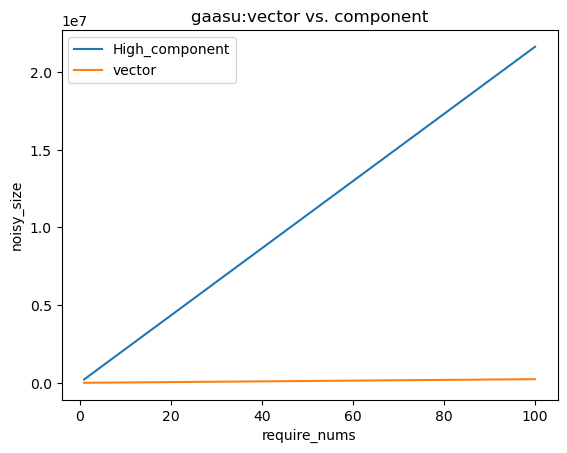

In [3]:
ks = np.linspace(1, 100, 20)
epsilon = .1
delta = 1e-5

# 每个问询的L2敏感度：1
# 问询次数：k
noises_seq = [16*k*np.log(1.25/delta)*np.log(1/delta)/(epsilon**2) for k in ks]
plt.plot(ks, noises_seq, label='High_component')

# 问询次数：1
# 每个问询的L2敏感度：sqrt(k)
noises_l1 = [2*k*np.log(1.25/delta)/(epsilon**2) for k in ks]
plt.title('gaasu:vector vs. component')
plt.xlabel('require_nums')
plt.ylabel('noisy_size')
plt.plot(ks, noises_l1, label='vector')
plt.legend();

两者的图像甚至相距甚远，”向量化”的噪声尺度增长量远比高级组合性慢。这意味着什么呢？我们应该能在串行组合方面做得更好！

### 最大散度和瑞丽散度

可以证明，可以直接应用最大散度（Max Divergence）来描述差分隐私的定义。在统计学中，散度（Divergence）是一种度量两种概率分布差异的方法，而这正是差分隐私定义的基本思想。最大散度是KL散度（Kullback–Leibler Divergence）的最坏情况，也是度量概率分布差异最常见的方法之一。两个概率分布$Y$和$Z$的最大散度定义为：
\begin{align}
D_\infty(Y \Vert Z) = \max_{S \subseteq \text{Supp}(Y)} \Big[\log \frac{Pr[Y \in S]}{Pr[Z \in S]} \Big]
\end{align}
此定义从形式上看已经很像ε-差分隐私的定义了！特别地，可以证明如果：
\begin{align}
D_\infty(F(x) \Vert F(x') \leq \epsilon
\end{align}
则$F$满足$ε$-差分隐私。
差分隐私的一个有趣研究方向是尝试引入不同类型的散度来构建变种隐私定义。在已有的散度定义中，瑞丽散度（Rényi Divergence）尤其有趣，因为我们也可以（像最大散度一样）从瑞丽散度中恢复出差分隐私的原始定义。概率分布
$P$和$Q$的$α$阶瑞丽散度定义为：
\begin{align}
D_\alpha(P \Vert Q) = \frac{1}{\alpha - 1} \log E_{x \sim Q} \Big(\frac{P(x)}{Q(x)}\Big)^\alpha
\end{align}
其中$P(x)$和$Q(x)$分别为$P$和$Q$在点$x$处的概率密度。
如果我们令$\alpha = \infty$，则我们可以立即恢复出$\epsilon$-差分隐私的定义！我们会自然而然地想到这样一个问题：如果我们把$\alpha$设置为别的数会发生什么？我们接下来将看到，使用瑞丽散度可以得到有趣的宽松差分隐私定义，这些定义对于组合定理更加友好，同时可以避免像$(\epsilon, \delta)$-差分隐私定义那样出现灾难性失败的可能。

我们按照如下方法实现满足瑞丽差分隐私的高斯机制：

In [4]:
def gaussian_mech_RDP_vec(vec, sensitivity, alpha, epsilon_bar):
    sigma = np.sqrt((sensitivity**2 * alpha) / (2 * epsilon_bar))
    return [v + np.random.normal(loc=0, scale=sigma) for v in vec]

瑞丽差分隐私的主要优势是，用高斯机制实现的瑞丽差分隐私满足紧致组合性。同时，组合使用机制时不需要引入特殊的高级组合定理

### 零集中差分隐私

Mark Bun和Thomas Steinke也考虑到了类似的问题。他们于2016年提出了零集中差分隐私（Zero-concentrated Differential Privacy，zCDP） [11]。与瑞丽差分隐私相同，零集中差分隐私也是根据瑞丽散度定义的差分隐私变体。不过，零集中差分隐私定义只包含了一个隐私参数（$\rho$）。如果对于所有的临近数据集$x$和$x'$，以及所有的$\alpha \in (1, \infty)$，如果一个随机机制$F$满足：
\begin{align}
D_\alpha (F(x) \Vert F(x')) \leq \rho\alpha
\end{align}
则称此$F$满足$\rho$-零集中差分隐私
$$\epsilon = \rho + 2\sqrt{\rho \log(1/\delta)}$$
\begin{align}
F(x) = f(x) + \mathcal{N}(\sigma^2) \text{ 其中 } \sigma^2 = \frac{\Delta f^2}{2\rho}
\end{align}

与瑞丽差分隐私一样，很容易实现零集中差分隐私机制：

In [5]:
def gaussian_mech_zCDP_vec(vec, sensitivity, rho):
    sigma = np.sqrt((sensitivity**2) / (2 * rho))
    return [v + np.random.normal(loc=0, scale=sigma) for v in vec]

最后，零集中差分隐私同样满足后处理性。

### 不同差分隐私变体的组合性

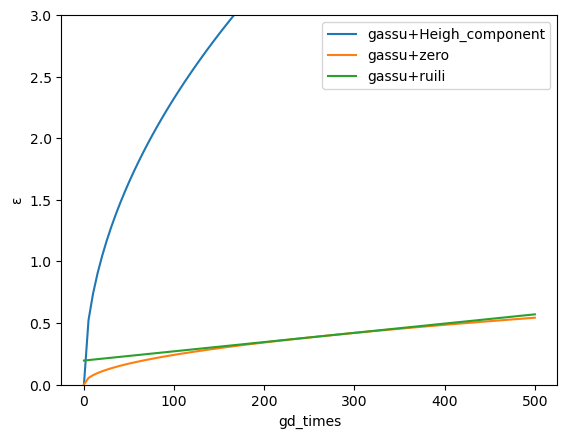

In [6]:
sigma = 200.0
delta = 1e-5
lap_eps = 2*sigma**2
xs = np.linspace(0, 500, 100)

gauss_eps = np.sqrt(2 * np.log(1.25/delta) / sigma**2)
ys_gauss = [x * np.sqrt(2 * np.log(1.25/delta) / sigma**2) for x in xs]

ys_gauss_adv = [2 * gauss_eps * np.sqrt(2 * x * np.log(1/delta)) for x in xs]

rho = 1/(2*sigma**2)
ys_gauss_zcdp = [(x*rho) + 2*np.sqrt((x*rho) * np.log(1/delta)) for x in xs]

alpha = 60
rdp_eps = alpha / (2*sigma**2)

ys_gauss_rdp = [(x*rdp_eps) + np.log(1/delta)/(alpha-1) for x in xs]

# ys_moments = [4*np.sqrt(x*np.log(1/delta))/sigma for x in xs]

plt.plot(xs, ys_gauss_adv, label="gassu+Heigh_component")
plt.plot(xs, ys_gauss_zcdp, label="gassu+zero")
plt.plot(xs, ys_gauss_rdp, label="gassu+ruili")
# plt.plot(xs, ys_moments, label="Moments Accountant")

plt.xlabel('gd_times')
plt.ylabel('ε')
plt.ylim(0, 3.0)


plt.legend()
plt.show();

首先要注意的是，无论应用零集中差分隐私还是瑞丽差分隐私，其串行组合性都比应用高级组合性的$(\epsilon, \delta)$-差分隐私所得到的总隐私消耗量要好得多。当使用高斯机制来构造迭代算法时，应该优先考虑使用这些差分隐私变体。

该差异的实际影响在于，使用瑞丽差分隐私时必须慎重选择$\alpha$的取值，以得到尽可能紧致的隐私消耗量。通常很容易做到这一点，因为算法本身一般也需要以$\alpha$作为输入参数，因此我们可以简单地测试多个$\alpha$的取值，观察哪个值得到的隐私消耗量$\epsilon$最小。因为该测试与数据无关（仅与我们选择的隐私参数和迭代次数有关），我们可以根据需要测试任意数量的$\alpha$，这不会增加额外的隐私消耗量。我们只需要测试少量的$\alpha$（一般可以令$\alpha$从2取到100）即可找到最小值。实际应用中大多都会使用此方法。谷歌的差分隐私Tensorflow就是使用此方法来得到适当的$\alpha$。

## 指数机制

截至目前，我们已学习的基本机制（拉普拉斯机制和高斯机制）针对的都是数值型回复，只需直接在回复的数值结果上增加噪声即可。如果我们想返回一个准确结果（即不能直接在结果上增加噪声），同时还要保证回复过程满足差分隐私，该怎么办呢？一种解决方法是使用指数机制（Exponential Mechanism）[12]。此机制可以从备选回复集合中选出”最佳”回复的同时，保证回复过程满足差分隐私。分析者需要定义一个备选回复集合。同时，分析者需要指定一个评分函数（Scoring Function），此评分函数输出备选回复集合中每个回复的分数。分数最高的回复就是最佳回复。指数机制通过返回分数近似最大的回复来实现差分隐私保护。换言之，为了使回复过程满足差分隐私，指数机制返回结果所对应的分数可能不是备选回复集合中分数最高的那个结果。

指数机制满足$\epsilon$-差分隐私：
1.分析者选择一个备选回复集合$\mathcal{R}$
2.分析者指定一个全局敏感度为$\Delta u$的评分函数$u : \mathcal{D} \times \mathcal{R} \rightarrow \mathbb{R}$
3.指数机制输出$r \in \mathcal{R}$，各个回复的输出概率与下述表达式成正比：
\begin{align}
\exp \Big(\frac{\epsilon u(x, r)}{2 \Delta u} \Big)
\end{align}
和我们之前学习过的机制（如拉普拉斯机制）相比，指数机制最大的不同点在于其总会输出集合$\mathcal{R}$中的一个元素。当必须从一个有限集合中选择输出结果，或不能直接在结果上增加噪声时，指数机制就会变得非常有用。例如，假设我们要为一个大型会议敲定一个日期。为此，我们获得了每个参会者的日程表。我们想选择一个与尽可能少的参会者有时间冲突的日期来举办会议，同时想通过差分隐私为所有参会者的日程信息提供隐私保护。在这个场景下，在举办日期上增加噪声没有太大意义，增加噪声可能会使日期从星期五变成星期六，使冲突参会者的数量显著增加。应用指数机制就可以完美解决此类问题：既不需要在日期上增加噪声，又可以实现差分隐私。

### 有限集合的指数机制

In [7]:
import numpy as np
import pandas as pd

# 去标识
adult = pd.read_csv('adult_with_pii.csv')

options = adult['Marital Status'].unique()

def score(data, option):
    return data.value_counts()[option]/1000

score(adult['Marital Status'], 'Never-married')

10.684

In [8]:
def exponential(x, R, u, sensitivity, epsilon):
    # 计算R中每个回复的分数
    scores = [u(x, r) for r in R]
    
    # 根据分数计算每个回复的输出概率
    probabilities = [np.exp(epsilon * score / (2 * sensitivity)) for score in scores]
    
    # 对概率进行归一化处理，使概率和等于1
    probabilities = probabilities / np.linalg.norm(probabilities, ord=1)

    # 根据概率分布选择回复结果
    return np.random.choice(R, 1, p=probabilities)[0]

exponential(adult['Marital Status'], options, score, 1, 1)

'Married-civ-spouse'

In [9]:
r = [exponential(adult['Marital Status'], options, score, 1, 1) for i in range(200)]
pd.Series(r).value_counts()

Married-civ-spouse       179
Never-married             20
Married-spouse-absent      1
Name: count, dtype: int64

### 报告噪声最大值

我们能用拉普拉斯机制实现指数机制吗？当$R$为有限集合时，指数机制的基本思想是使从集合中选择元素的过程满足差分隐私。我们可以应用拉普拉斯机制给出此基本思想的一种朴素实现方法：
1.对于每个$r \in \mathcal{R}$，计算噪声分数$u(x, r) + \mathsf{Lap}\left(\frac{\Delta u}{\epsilon}\right)$
2.输出噪声分数最大的元素$r \in \mathcal{R}$

然而，如果我们使用指数机制，则总隐私消耗量将只有$ε$！为什么指数机制效果如此之好？原因是指数机制泄露的信息更少。

输出噪声最大值算法的实现方法非常简单，而且很容易看出，此算法得到的回复结果与之前我们实现的有限集合指数机制非常相似。

In [10]:
def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity/epsilon)
def report_noisy_max(x, R, u, sensitivity, epsilon):
    # 计算R中每个回复的分数
    scores = [u(x, r) for r in R]

    # 为每个分数增加噪声
    noisy_scores = [laplace_mech(score, sensitivity, epsilon) for score in scores]

    # 找到最大分数对应的回复索引号
    max_idx = np.argmax(noisy_scores)
    
    # 返回此索引号对应的回复
    return R[max_idx]

report_noisy_max(adult['Marital Status'], options, score, 1, 1)

'Married-civ-spouse'

In [11]:
r = [report_noisy_max(adult['Marital Status'], options, score, 1, 1) for i in range(200)]
pd.Series(r).value_counts()

Married-civ-spouse    199
Never-married           1
Name: count, dtype: int64

### 指数机制是差分隐私的基本机制

我们已经知道，无法使用拉普拉斯机制与串行组合性来实现指数机制，这是因为当使用拉普拉斯机制与串行组合性时，我们可以得到差分隐私保护的所有噪声分数，但我们想实现的差分隐私算法不需要发布这些噪声分数。那么，反过来又如何呢？我们可以应用指数机制实现拉普拉斯机制吗？事实证明，这是可以做到的！

考虑一个敏感度为$\Delta q$的问询函数$q(x) : \mathcal{D} \rightarrow \mathbb{R}$。我们可以在真实回复值上增加拉普拉斯噪声$F(x) = q(x) + \mathsf{Lap}(\Delta q / \epsilon)$，以得到满足$\epsilon$-差分隐私的回复结果。差分隐私回复$q$的概率密度函数为：
\begin{align}
\mathsf{Pr}[F(x) = r] =& \frac{1}{2b} \exp\Big(- \frac{|r - \mu|}{b}\Big)\\
=& \frac{\epsilon}{2 \Delta q} \exp\Big(- \frac{\epsilon |r - q(x)|}{\Delta q}\Big)
\end{align}

考虑一下，当我们将指数机制的评分函数设置为$u(x, r) = -2 | q(x) - r |$
时会发生什么？指数机制的定义告诉我们，每个回复值的采样概率应该与下述表达式成正比：
\begin{align}
\mathsf{Pr}[F(x) = r] =&\; \exp \Big(\frac{\epsilon u(x, r)}{2 \Delta u} \Big)\\
&= \exp \Big(\frac{\epsilon (-2 | q(x) - r |)}{2 \Delta q} \Big)\\
&= \exp \Big(- \frac{\epsilon | r - q(x) |}{\Delta q} \Big)\\
\end{align}

因此，可以应用指数机制实现拉普拉斯机制，并得到相同的概率分布（两个概率分布可能会相差一个常数因子，这是因为指数机制的通用分析结论不一定在所有情况下都是紧致的）。

指数机制非常具有普适性。一般情况下，通过精心选择评分函数$u$，我们可以用指数机制重定义任何$\epsilon$-差分隐私机制。只要我们可以分析出该评分函数的敏感度，我们就可以轻松证明相应机制满足差分隐私。

另一方面，指数机制之所以具有普适性，是因为其通用分析方法得到的隐私消耗量边界可能会更宽松一些（就像前面给出的拉普拉斯例子那样）。此外，用指数机制定义的差分隐私机制一般都比较难实现。指数机制通常用于证明理论下界（即证明差分隐私算法的存在性）。在实际中，一般会使用一些其他的算法来复现指数机制（如前面描述的输出噪声最大值例子）。